In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [ ]:
from google.colab import files
files.upload()

In [3]:
df = pd.read_csv('bitcoin.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3088,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516
3089,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
3090,2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913
3091,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733


In [4]:
del df['Adj Close']

In [5]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
# Изменение, %
new_col = ['Open', 'High', 'Low', 'Close', 'Volume']
col_count = len(new_col)

new_row = [[] for i in range(col_count)]
row_count = df.count()[0]

for i in range(col_count):
  col = df[new_col[i]]
  new_row[i].append(0)

  for j in range(1, row_count):
    new_row[i].append((col[j] / col[j - 1] - 1) * 100)
  
  df[new_col[i] + ' Diff'] = new_row[i]

df

,Date,Open,High,Low,Close,Volume,Open Diff,High Diff,Low Diff,Close Diff,Volume Diff
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.000000,0.000000,0.000000,0.000000,0.000000
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-1.932759,-2.416628,-8.690557,-7.192558,63.762775
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-7.170028,-6.353149,-6.916416,-6.984264,9.965722
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,-6.939350,-1.060923,1.391557,3.573492,-2.785096
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,3.398253,-2.567942,0.845896,-2.465855,-27.896082
...,...,...,...,...,...,...,...,...,...,...,...
3088,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,20386398516,2.142851,-0.592506,0.677366,-0.723505,-17.339619
3089,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,26062404610,-0.720542,-1.094357,-4.438728,-4.740213,27.842123
3090,2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,11166012913,-4.743904,-4.574956,-0.064186,-0.041722,-57.156628
3091,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,13317001733,-0.039258,0.930623,0.487239,0.367569,19.263714


In [9]:
df.to_csv('bitcoin_dataset.csv')

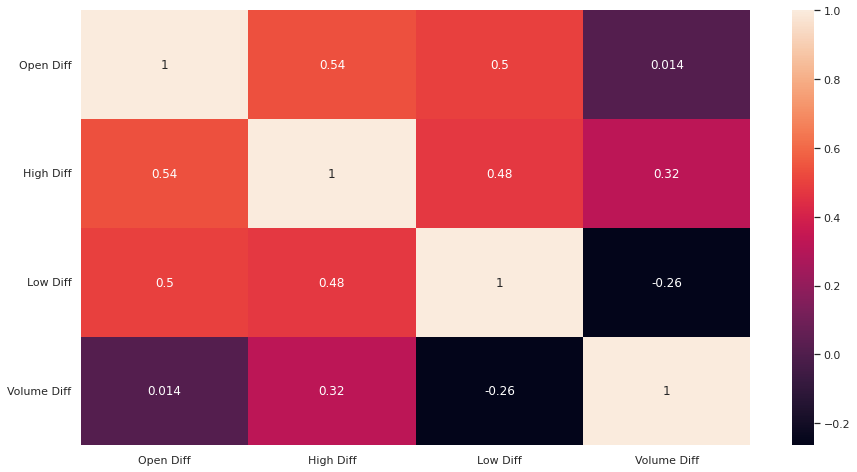

In [8]:
features = ['Open Diff', 'High Diff',	'Low Diff', 'Volume Diff']
target = 'Close Diff'

sns.heatmap(df[features].corr(), annot=True)
plt.gcf().set_size_inches(15, 8)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.3, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

In [11]:
model.score(x_train, y_train)

0.7320495150189266

In [12]:
model.score(x_test, y_test)

0.7035828350879462

In [13]:
mean_squared_error(y_train, model.predict(x_train))

4.032254117842185

In [14]:
mean_squared_error(y_test, model.predict(x_test))

3.9156649398861303